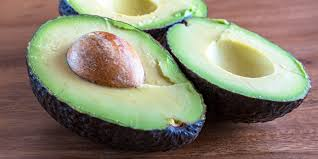

# Libraries

In [ ]:
# for visualization -------------------

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# for data pipeline --------------------

from sklearn.model_selection import train_test_split
from sklearn.metrics import*
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import make_pipeline

# for prediction (machine learning models) ------------------------

from sklearn.linear_model import*
from sklearn.preprocessing import*
from sklearn.ensemble import*
from sklearn.neighbors import*
from sklearn import svm
from sklearn.naive_bayes import*

# Data gathering and Primary visualization

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df=pd.read_csv('/kaggle/input/avocado-prices/avocado.csv')
df.head()

In [ ]:
df.info()

In [ ]:
print('shape of the data :',df.shape)

If there is any duplicates we can remove them now.

In [ ]:
print('total number of duplicate values : ',sum(df.duplicated()))

So we do not have to drop any row or column and we can proceed to the next step.

# Train and validation data

As we are predicting the price of the avocados we are going to put the prices column in the Y and rest of the data in X

In [ ]:
X=df.drop('AveragePrice',1)
y=df['AveragePrice']

In [ ]:
print('shape of X and y respectively :',X.shape,y.shape)

As the dataset is medium in size we can perform a 80-20 train test split over the dataset.

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
print('shape of X and y respectively(train) :',X_train.shape,y_train.shape)
print('shape of X and y respectively(test) :',X_test.shape,y_test.shape)

In [ ]:
cols=X_train.columns

# Preprocessing

#### Encoding

At first we have to encode all the categorical columns to dig deep into the data.

In [ ]:
scaler=LabelEncoder()

In [ ]:
for col in X_train.columns:
    if df[col].dtype=='object':
        X_train[col]=scaler.fit_transform(X_train[col])
        X_test[col]=scaler.transform(X_test[col])

In [ ]:
X_train.head()

#### Variance thresholding

Now after encoding the dataframe we have to omit the columns which are not contributing any pattern or key for finding good accuracy. That means we are going to drop the columns which have less variance than 0.1

In [ ]:
scaler=VarianceThreshold(0.1)

In [ ]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
print('shape of X (train) :',X_train.shape)
print('shape of X (test) :',X_test.shape)

Now we have found that every single  column is useful for predicting the data

#### Scaling

In [ ]:
plt.plot(X_train[0])

This graph shows that the every single feature has different value ranges. So we need to scale the data for better performances.

In [ ]:
scaler=StandardScaler()


In [ ]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
print("Type of X_train :",type(X_train))
print("Type of X_test :",type(X_test))

So basically after using the variance thershold and standard scaler of sklearn module we have changed the pandas dataframe in numpy ndarray. So we are  going to convert them into pandas dataframe.

In [ ]:
X_train=pd.DataFrame(X_train,columns=cols)
X_train.head()
X_test=pd.DataFrame(X_test,columns=cols)
X_test.head()

In [ ]:
print('Type of X_train and X_test :',type(X_train),type(X_test))

Now we can start the prediction.

# Pipelines

As this is a regression problem we are going to use famous regression models -
   1. Polynomial Regressor
   2. RandomForest Regressor
   3. Ridge Regressor
   4. Lasso Regressor
   5. Bayesian Ridge Regressor

In [ ]:
actr=[]
acts=[]
lstr=[]
lsts=[]

### Polynomial Regression

In [ ]:
loss=[]
val_loss=[]

In [ ]:
for i in range(2,5):
  clf=make_pipeline(PolynomialFeatures(i),LinearRegression())
  clf.fit(X_train,y_train)
  y_pr=clf.predict(X_test)
  y_x=clf.predict(X_train)
  loss.append(mean_squared_error(y_train,y_x))
  val_loss.append(mean_squared_error(y_test,y_pr))

In [ ]:
plt.title('Model Loss')
plt.xlabel('degree')
plt.ylabel('MSE loss')
plt.plot(range(2,5),loss/np.mean(loss),label='train loss')
plt.plot(range(2,5),val_loss/np.mean(val_loss),label='validation loss')
plt.legend()
plt.show()

We can say that degree =3 is appropriate for the model as the validation has too little loss and after that it reaches to a very high peak. That means after degree>3 ,the model is overfitting.

In [ ]:
print('Train loss and validation loss of the polynomial function model :',loss[1],'and',val_loss[1])

In [ ]:
clf=make_pipeline(PolynomialFeatures(3),LinearRegression())
clf.fit(X_train,y_train)
print('train accuracy :',clf.score(X_train,y_train))
print('test accuracy :',clf.score(X_test,y_test))

Though degree=3 has the best accuracy over the polynomial function still it is very low and we can see that the valiation accurcay is less than 50%. So, it is not a good model.

In [ ]:
actr.append(clf.score(X_train,y_train))
acts.append(clf.score(X_test,y_test))
lstr.append(loss[1])
lsts.append(val_loss[1])

### Random Forest Regression

In [ ]:
clf=RandomForestRegressor(random_state=0)

In [ ]:
clf.fit(X_train,y_train)
y_tr1=clf.predict(X_train)
y_pr=clf.predict(X_test)

print('train data accuracy :',clf.score(X_train,y_train))
print('test data accuracy :',clf.score(X_test,y_test))
print('loss of train data :',mean_squared_error(y_train,y_tr1))
print('loss of test data :',mean_squared_error(y_test,y_pr))

So we can see the RFR really predicts the model very well and gives a quite accurate prediction.

In [ ]:
actr.append(clf.score(X_train,y_train))
acts.append(clf.score(X_test,y_test))
lstr.append(mean_squared_error(y_train,y_tr1))
lsts.append(mean_squared_error(y_test,y_pr))

### Ridge Regressor

In [ ]:
loss=[]
val_loss=[]

In [ ]:
for i in range(1,11):
  clf=Ridge(random_state=0,alpha=i/100.0)
  clf.fit(X_train,y_train)
  y_pr=clf.predict(X_test)
  y_x=clf.predict(X_train)
  loss.append(mean_squared_error(y_train,y_x))
  val_loss.append(mean_squared_error(y_test,y_pr))

In [ ]:
plt.title('Model Loss')
plt.xlabel('alpha')
plt.ylabel('MSE loss')
plt.plot(np.arange(1,11,1)/100,loss/np.mean(loss),label='train loss')
plt.plot(np.arange(1,11,1)/100,val_loss/np.mean(val_loss),label='validation loss')
plt.legend()
plt.show()

So we can say that the increase in alpha also affecting the model badly and giving us more loss than before.

In [ ]:
clf=Ridge(random_state=0,alpha=0.01)
clf.fit(X_train,y_train)
y_tr1=clf.predict(X_train)
y_pr=clf.predict(X_test)

print('train data accuracy :',clf.score(X_train,y_train))
print('test data accuracy :',clf.score(X_test,y_test))
print('loss of train data :',mean_squared_error(y_train,y_tr1))
print('loss of test data :',mean_squared_error(y_test,y_pr))

Still this model gives very bad stats in fitting.

In [ ]:
actr.append(clf.score(X_train,y_train))
acts.append(clf.score(X_test,y_test))
lstr.append(mean_squared_error(y_train,y_tr1))
lsts.append(mean_squared_error(y_test,y_pr))

### Lasso Regression

In [ ]:
loss=[]
val_loss=[]

In [ ]:
for i in range(1,11):
  clf=Lasso(random_state=0,alpha=i/100.0)
  clf.fit(X_train,y_train)
  y_pr=clf.predict(X_test)
  y_x=clf.predict(X_train)
  loss.append(mean_squared_error(y_train,y_x))
  val_loss.append(mean_squared_error(y_test,y_pr))

In [ ]:
plt.title('Model Loss')
plt.xlabel('alpha')
plt.ylabel('MSE loss')
plt.plot(np.arange(1,11,1)/100,loss/np.mean(loss),label='train loss')
plt.plot(np.arange(1,11,1)/100,val_loss/np.mean(val_loss),label='validation loss')
plt.legend()
plt.show()

Lasso model also gives us similar results as we got in Ridge. We're taking the alpha=0.01

In [ ]:
clf=Lasso(random_state=0,alpha=0.01)
clf.fit(X_train,y_train)
y_tr1=clf.predict(X_train)
y_pr=clf.predict(X_test)

print('train data accuracy :',clf.score(X_train,y_train))
print('test data accuracy :',clf.score(X_test,y_test))
print('loss of train data :',mean_squared_error(y_train,y_tr1))
print('loss of test data :',mean_squared_error(y_test,y_pr))

In [ ]:
actr.append(clf.score(X_train,y_train))
acts.append(clf.score(X_test,y_test))
lstr.append(mean_squared_error(y_train,y_tr1))
lsts.append(mean_squared_error(y_test,y_pr))

### Bayesian Ridge Regression

In [ ]:
clf=BayesianRidge()

In [ ]:
clf.fit(X_train,y_train)
y_tr1=clf.predict(X_train)
y_pr=clf.predict(X_test)

print('train data accuracy :',clf.score(X_train,y_train))
print('test data accuracy :',clf.score(X_test,y_test))
print('loss of train data :',mean_squared_error(y_train,y_tr1))
print('loss of test data :',mean_squared_error(y_test,y_pr))

In [ ]:
actr.append(clf.score(X_train,y_train))
acts.append(clf.score(X_test,y_test))
lstr.append(mean_squared_error(y_train,y_tr1))
lsts.append(mean_squared_error(y_test,y_pr))

# Model Evaluation & Conclusion

In [ ]:
models=['Polynomial','Random Forest','Ridge','Lasso','Bayesian Ridge']

In [ ]:
plt.title('Model Accuracy')
plt.plot(models,actr,label='train data')
plt.plot(models,acts,label='validation data')
plt.legend()
plt.show()

plt.title('Model Loss')
plt.plot(models,lstr,label='train data')
plt.plot(models,lsts,label='validation data')
plt.legend()
plt.show()

So, after visualizing , we have found that ,

                  Model performance :
                           Random Forest > Ridge > Bayesian Ridge > Lasso > Polynomial

After model evaluation we can conclude that, high dimensional data can not be fit well in low dimensional models and can give abrupt conclusions that may led to lower accuracy.

The RFR uses leafs that can reduce the dimensional complexity and generalize the model in a better approach. Thus it presents the best accuracy over the data.

Hurrah ! We have successfully completed this project .

**Upvote** in *kaggle* and **star** in *gitub*  if you like this kernel  **:)**

You can visit my otherworks in [*github*](https://github.com/sagnik1511?tab=repositories)  and in [*kaggle*](https://www.kaggle.com/sagnik1511)

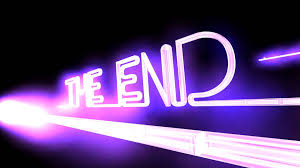